#                                           Prediction using Neural Networks

In [1]:
# Importing the modules for data handling, visualization, and machine learning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Defining column names for the dataset

columns = ['Country', 'JobTitle', 'Category', 'CostofLivingIndex',  'RentIndex', 
            'CostofLivingPlusRentIndex', 'GroceriesIndex',  'RestaurantPriceIndex',   
            'LocalPurchasingPowerIndex', 'Salary'
           ]

# Loading the dataset with predefined column names           
df = pd.read_csv('Global_Salary_Data_2024_Processed.csv', header = None,
                  names=columns , skiprows=1, low_memory=False)


In [3]:
# Displaying the structure of the dataset

df.info()
'''
df.describe(include='all')

df.columns

df.shape
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88485 entries, 0 to 88484
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    88485 non-null  object 
 1   JobTitle                   88485 non-null  object 
 2   Category                   88485 non-null  object 
 3   CostofLivingIndex          88485 non-null  float64
 4   RentIndex                  88485 non-null  float64
 5   CostofLivingPlusRentIndex  88485 non-null  float64
 6   GroceriesIndex             88485 non-null  float64
 7   RestaurantPriceIndex       88485 non-null  float64
 8   LocalPurchasingPowerIndex  88485 non-null  float64
 9   Salary                     88485 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 6.8+ MB


"\ndf.describe(include='all')\n\ndf.columns\n\ndf.shape\n"

In [4]:
# Displaying the first few rows of the dataset

df.head()


,Country,JobTitle,Category,CostofLivingIndex,RentIndex,CostofLivingPlusRentIndex,GroceriesIndex,RestaurantPriceIndex,LocalPurchasingPowerIndex,Salary
0,Afghanistan,Cardiovascular Specialist,Health and Medical,0.228,0.028,0.133,0.173,0.13,0.224,55000
1,Afghanistan,Chief of Surgery,Health and Medical,0.228,0.028,0.133,0.173,0.13,0.224,60000
2,Afghanistan,Invasive Cardiologist,Health and Medical,0.228,0.028,0.133,0.173,0.13,0.224,55000
3,Afghanistan,Physician - Cardiology,Health and Medical,0.228,0.028,0.133,0.173,0.13,0.224,55000
4,Afghanistan,Surgeon - Cardiothoracic,Health and Medical,0.228,0.028,0.133,0.173,0.13,0.224,60000


In [5]:
# Encoding categorical features using one-hot encoding

encoded_df = pd.get_dummies(df)
encoded_df.head()


,CostofLivingIndex,RentIndex,CostofLivingPlusRentIndex,GroceriesIndex,RestaurantPriceIndex,LocalPurchasingPowerIndex,Salary,Country_Afghanistan,Country_Albania,Country_Algeria,...,Category_Public Relations,Category_Publishing and Printing,Category_Purchasing and Inventory,Category_Quality Control and Compliance,Category_Real Estate,Category_Recreation and Sports,Category_Sales Retail and Wholesale,Category_Science and Technical Services,Category_Teaching / Education,Category_Telecommunication
0,0.228,0.028,0.133,0.173,0.13,0.224,55000,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.228,0.028,0.133,0.173,0.13,0.224,60000,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.228,0.028,0.133,0.173,0.13,0.224,55000,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.228,0.028,0.133,0.173,0.13,0.224,55000,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.228,0.028,0.133,0.173,0.13,0.224,60000,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:

X = encoded_df.drop(columns = ["Salary"])
y = encoded_df["Salary"].values.reshape(-1,1)

# Checking the shapes of features and target variable
X.shape
y.shape

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Initializing scalers for feature and target variable scaling
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

x_scaler.fit(X_train)
y_scaler.fit(y_train)

# Transforming training and testing data using the fitted scalers
X_train_scaled = x_scaler.transform(X_train)
y_train_scaled = y_scaler.transform(y_train)

X_test_scaled = x_scaler.transform(X_test)
y_test_scaled =y_scaler.transform(y_test)


In [7]:
# Setting a random seed for reproducibility

seed_value = 0
np.random.seed(seed_value)

tf.random.set_seed(seed_value)


In [8]:
# Determining the number of input features

number_columns = X.shape[1]
print (f"number_columns: {number_columns}")

model = Sequential()

# Adding layers to the model
model.add(Dense(units = 128, input_dim = number_columns, activation = "relu"))

model.add(Dense(units = 256,  activation = "relu"))

model.add(Dense(units = 512,  activation = "relu"))

model.add(Dense(units = 1, activation = "linear"))

# Compiling the model with mean absolute error loss and Adam optimizer
model.compile(loss="mean_absolute_error", optimizer="adam", metrics=["mae", "mse"])

model.summary()


number_columns: 3780
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               483968    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 649,089
Trainable params: 649,089
Non-trainable params: 0
_________________________________________________________________


Epoch 1/25
1660/1660 [==============================] - 41s 23ms/step - loss: 0.0127 - mae: 0.0127 - mse: 5.8304e-04 - val_loss: 0.0083 - val_mae: 0.0083 - val_mse: 2.1910e-04
Epoch 2/25
1660/1660 [==============================] - 28s 17ms/step - loss: 0.0065 - mae: 0.0065 - mse: 1.3361e-04 - val_loss: 0.0061 - val_mae: 0.0061 - val_mse: 1.3802e-04
Epoch 3/25
1660/1660 [==============================] - 37s 22ms/step - loss: 0.0053 - mae: 0.0053 - mse: 8.3368e-05 - val_loss: 0.0057 - val_mae: 0.0057 - val_mse: 1.2437e-04
Epoch 4/25
1660/1660 [==============================] - 27s 17ms/step - loss: 0.0047 - mae: 0.0047 - mse: 6.0029e-05 - val_loss: 0.0053 - val_mae: 0.0053 - val_mse: 1.1713e-04
Epoch 5/25
1660/1660 [==============================] - 30s 18ms/step - loss: 0.0043 - mae: 0.0043 - mse: 4.7617e-05 - val_loss: 0.0048 - val_mae: 0.0048 - val_mse: 1.0094e-04
Epoch 6/25
1660/1660 [==============================] - 23s 14ms/step - loss: 0.0040 - mae: 0.0040 - mse: 4.1379e-05 - v

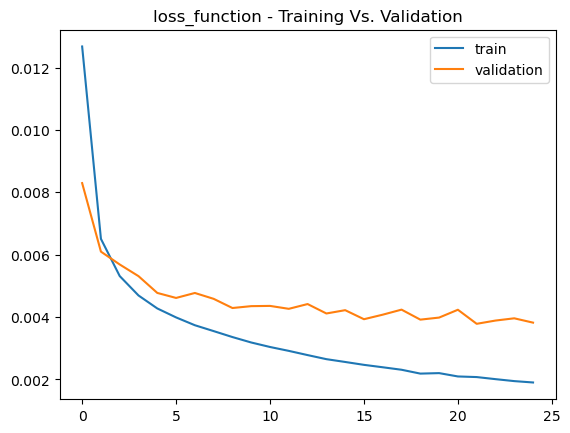

692/692 [==============================] - 4s 5ms/step


In [9]:
# Training the model on scaled data with validation split
history = model.fit(X_train_scaled, y_train_scaled,validation_split=0.2, epochs=25)

# Plotting the training and validation loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("loss_function - Training Vs. Validation")
plt.legend(["train", "validation"])

plt.show()

model.evaluate(X_test_scaled, y_test_scaled)

predictions = model.predict(X_test_scaled)

# Inversely transforming predictions to original salary scale
predicted_salaries = y_scaler.inverse_transform(predictions)
real_salaries = y_scaler.inverse_transform(y_test_scaled.reshape(-1, 1))



In [10]:
# Creating a DataFrame to compare real and predicted salaries

salaries = pd.DataFrame({
    "Real": np.round(real_salaries.ravel()).astype(int),
    "Prediction": np.round(predicted_salaries.ravel()).astype(int),
    "Variance (%)": np.round((predicted_salaries.ravel()-real_salaries.ravel())
                            /real_salaries.ravel()*100, 2)
})

salaries.head()


,Real,Prediction,Variance (%)
0,65000,65749,1.15
1,100000,95920,-4.08
2,60000,60661,1.10
3,65000,66263,1.94
4,90000,93619,4.02
